# Bank loan data science project

## The main goal of the project is to predict if a customer of the bank will pay off their loan or not, so basically if the bank could trust the customer with a loan

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


0 loan_amnt	-- The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. 

1	term -- The number of payments on the loan. Values are in months and can be either 36 or 60.

2	int_rate --	Interest Rate on the loan

3	installment	-- The monthly payment owed by the borrower if the loan originates.

4	grade -- LC assigned loan grade

5	sub_grade -- LC assigned loan subgrade

6	emp_title -- The job title supplied by the Borrower when applying for the loan.*

7	emp_length -- Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

8	home_ownership -- The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

9	annual_inc -- The self-reported annual income provided by the borrower during registration.

10	verification_status -- Indicates if income was verified by LC, not verified, or if the income source was verified

11	issue_d -- The month which the loan was funded

12	loan_status	-- Current status of the loan

13	purpose	-- A category provided by the borrower for the loan request.

14	title -- The loan title provided by the borrower

15	zip_code -- The first 3 numbers of the zip code provided by the borrower in the loan application.

16	addr_state -- The state provided by the borrower in the loan application

17	dti	-- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

18	earliest_cr_line -- The month the borrower's earliest reported credit line was opened

19	open_acc -- The number of open credit lines in the borrower's credit file.

20	pub_rec	-- Number of derogatory public records

21	revol_bal -- Total credit revolving balance

22	revol_util -- Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

23	total_acc -- The total number of credit lines currently in the borrower's credit file

24	initial_list_status	-- The initial listing status of the loan. Possible values are – W, F

25	application_type -- Indicates whether the loan is an individual application or a joint application with two co-borrowers

26	mort_acc -- Number of mortgage accounts.

27	pub_rec_bankruptcies -- Number of public record bankruptcies


**Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [3]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\r\nNorth Deniseb...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\r\nEast Stephanie, ..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\r\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\r\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\r\nMauricestad, VA 00813"


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

We can see that there are a lot of categorical features which do not help at all the model as they are and we do have some missing data, to feature engineering is mandatory

In [6]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

We can see that the dataframe has many missing values among some features but I will deal with does a bit later, luckly the target column 'loan_status' doesn't have missing values, so the training of the model will not be affected

<AxesSubplot: xlabel='loan_status', ylabel='count'>

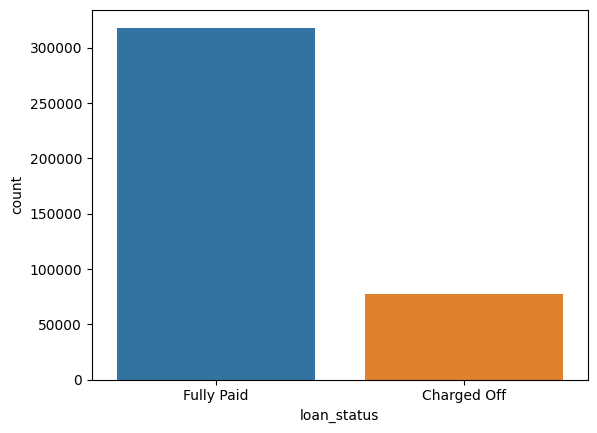

In [7]:
#Since it's a classification task, let's see the distribution of the outcomes
sns.countplot(x = 'loan_status', data = df)

- There are certainly much less 'Charged off' debts, but with the help of PowerBI I can exactly showcase the ratio procentualy by the total amounts of lent money (I preffered here PowerBI for better flexibility than the Python plotting libraries, later I'm going to also use Tableau for the same reasons)

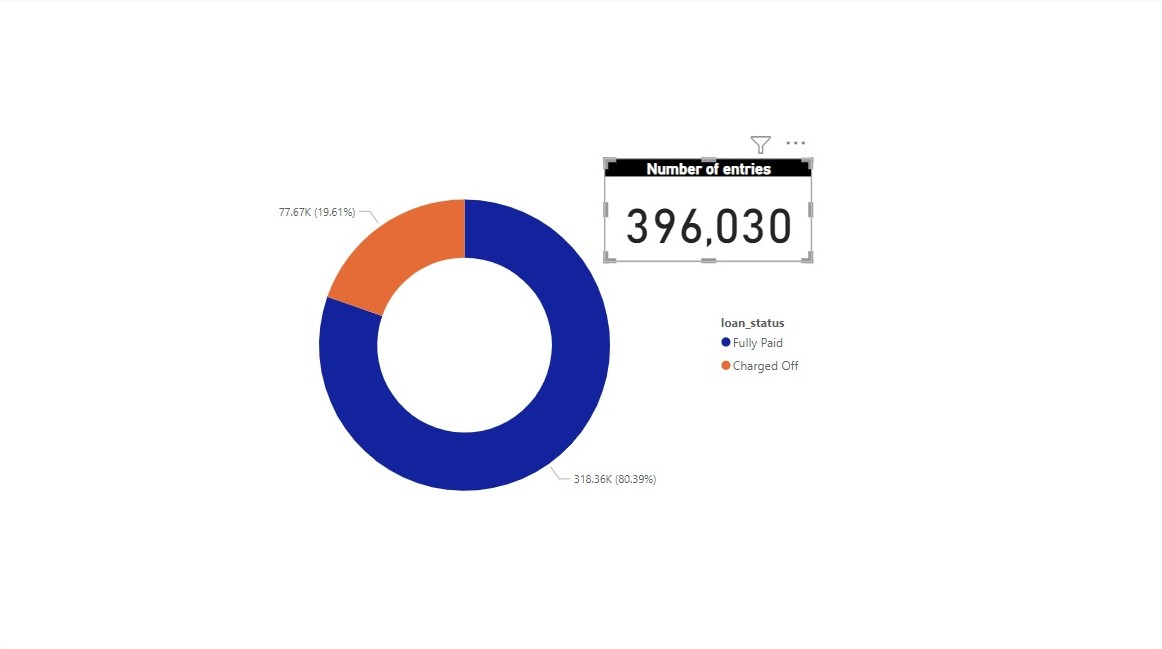


C:\Users\Leon\AppData\Local\Temp\ipykernel_3520\4268362986.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'], bins = 30, kde = False) #I used distplot rather than displot for a better display in this case from my opinion


(0.0, 40000.0)

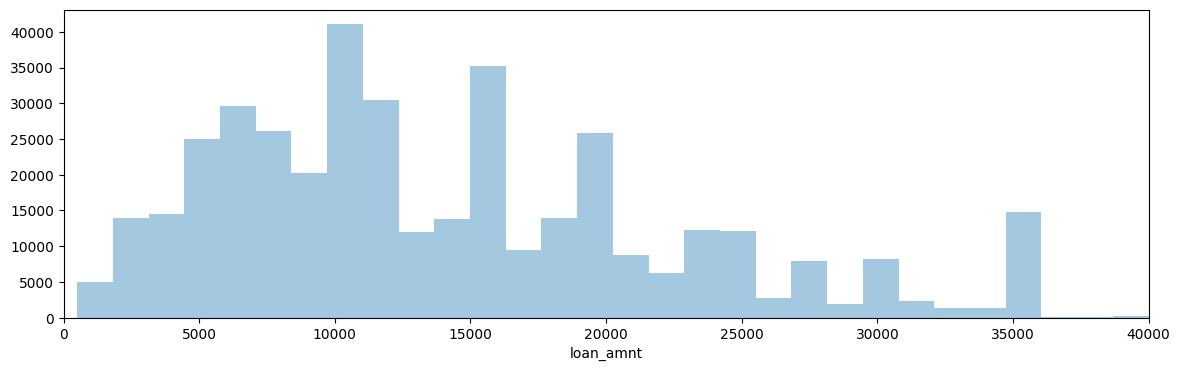

In [8]:
#Now let's explore the most populare loans in term of amount:
plt.figure(figsize=(14,4))
sns.distplot(df['loan_amnt'], bins = 30, kde = False) #I used distplot rather than displot for a better display in this case from my opinion
plt.xlim(0,40000)

- We can easily observe that the most loans tend to be arund the 10000s, some big loans are also popular, so for now we keep this distribution and see if it can help us later

<AxesSubplot: xlabel='annual_inc', ylabel='loan_amnt'>

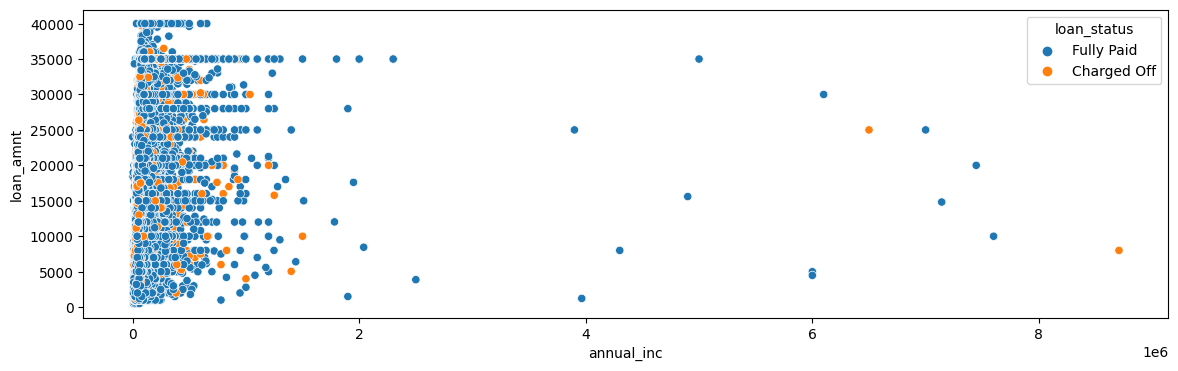

In [9]:
plt.figure(figsize=(14,4))
sns.scatterplot(x = 'annual_inc', y = 'loan_amnt',data = df, hue='loan_status')

- A good thought was to see what kind persons, more exactly with what kind of income would apply for loans, and it's clear that the most popular area is with people with income < 100k dollars/year
- We can see that most of the loan are paid off, however the 'charged off' ones all distributed all over the place, but most again are under 100k/year, so this could be a very important feature for our prediction
- Two very strange data points can be seen, where people with 600k/year and 800k/year would borrow realtively small amounts for them but would not pay them back, so this datapoints must be obligatorilly dropped, or else they influence our model extremely badly
- My opinion is to drop all points over 180-200k/year, since they are mostly outliers and would only punish our model, but I will come back to this before starting the build of the model

Here is a more detailed look that supports this decision to maybe cut the database at 200-250k/year via Tableau(for more detail, more quickly)

**Annual Income vs loan amount (hue = loan_status)
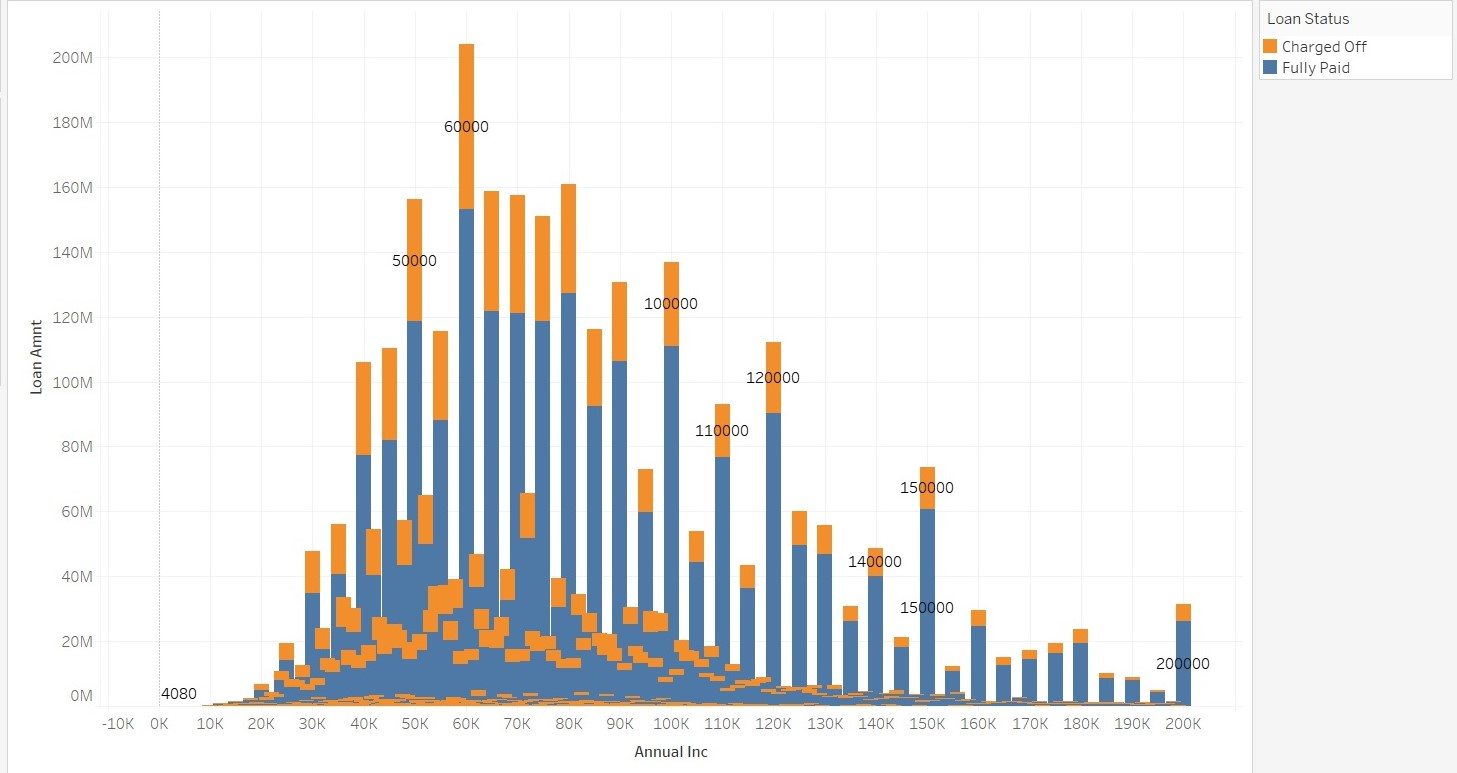


**Distribution for higher annual incomes**
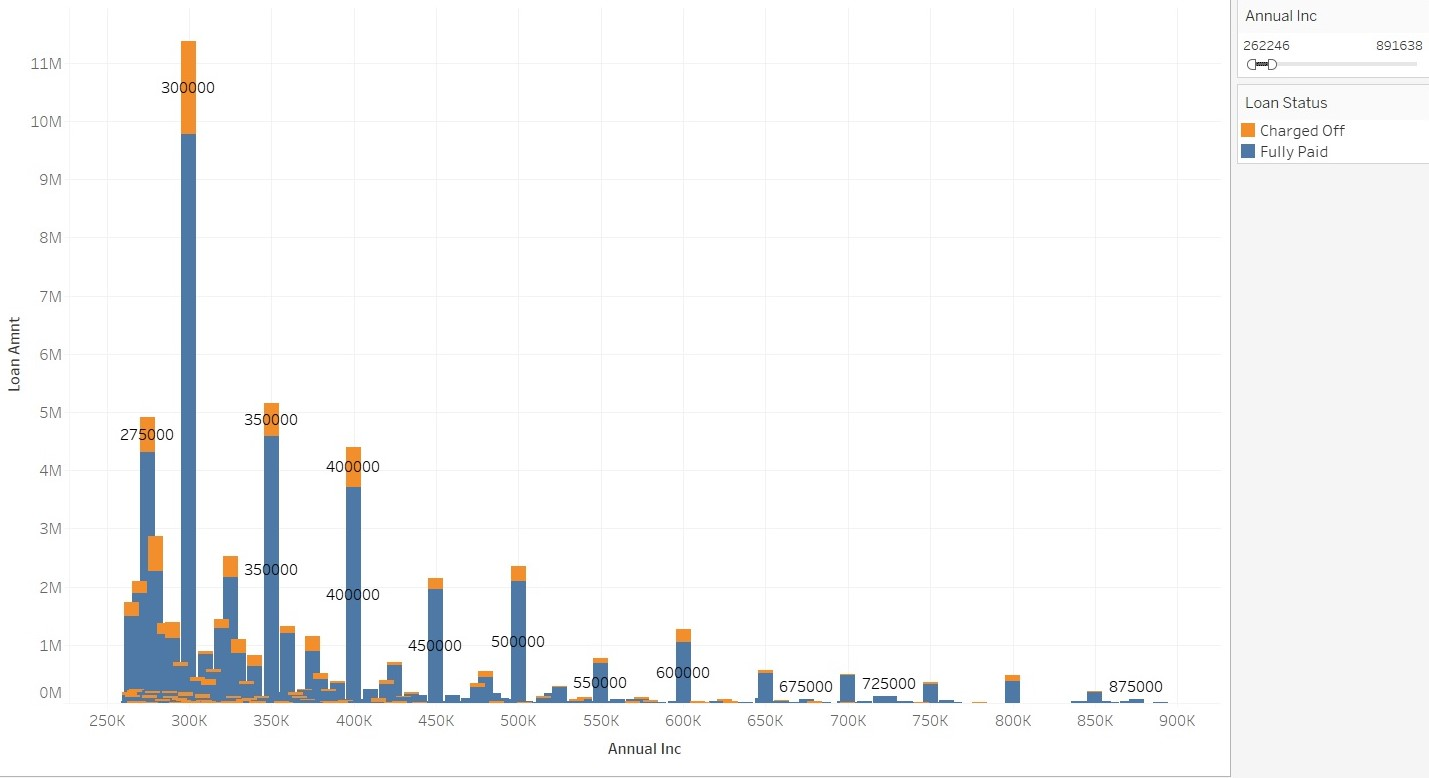

- We can see many outliers and no real connection, so maybe the decision is the right one, but let's explore further

- Let's represent the relationship between loan_status and loan_amnt

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

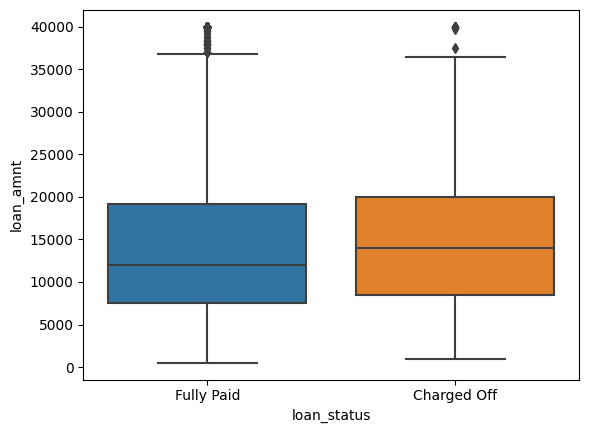

In [10]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

- Unfortunatelly this graph doesn't give away too much, given the good balance of the boxes by the loan_amnt
- Just in case, here is a quantitative representation of the previous boxplots:

In [11]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


- Indeed the statistics show approximately grately balanced values, so this 'loan_amnt' feature isn't too promising

In [12]:
df.corr()

C:\Users\Leon\AppData\Local\Temp\ipykernel_3520\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


C:\Users\Leon\AppData\Local\Temp\ipykernel_3520\3367280024.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot = True,)


<AxesSubplot: >

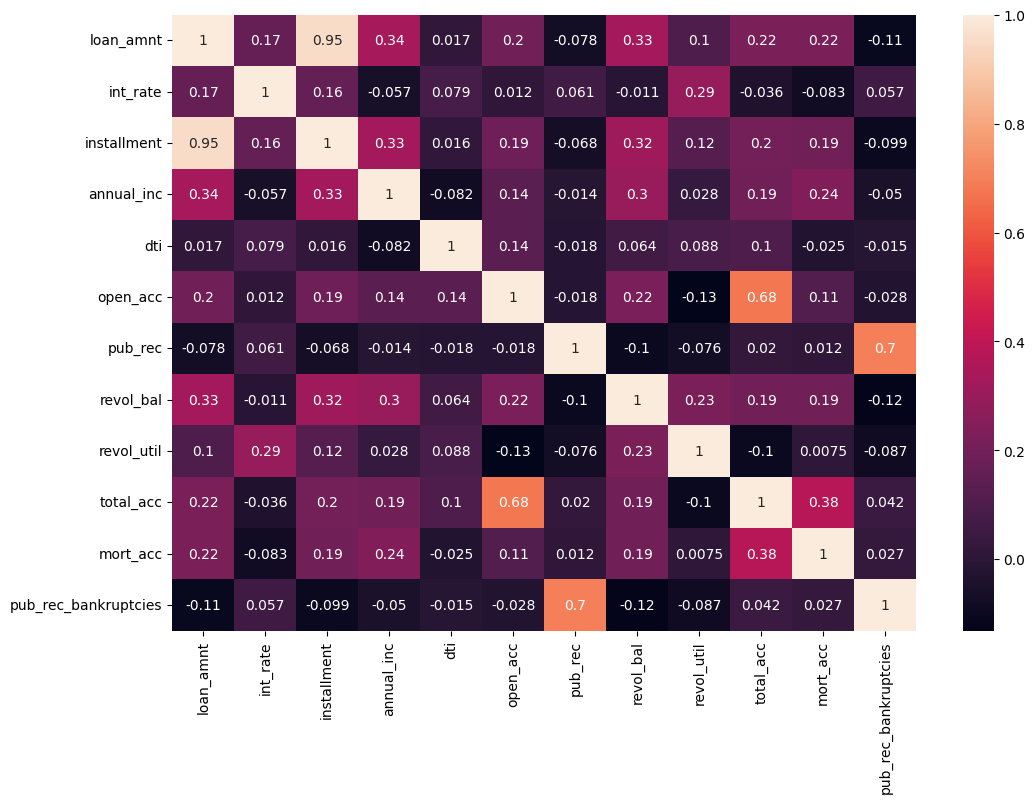

In [13]:
#This correlation table is hard to interpret, so it's better to present it visually:
plt.figure(figsize=(12,8))
sns.heatmap(data = df.corr(), annot = True,)

- There are some strong correlations between a few features(0.68, 0.7 also) but what catches th eye is the correlation between installement (so the monthly payment owed by the borrower) and the loan amount, which actually makes sense

<AxesSubplot: xlabel='loan_amnt', ylabel='installment'>

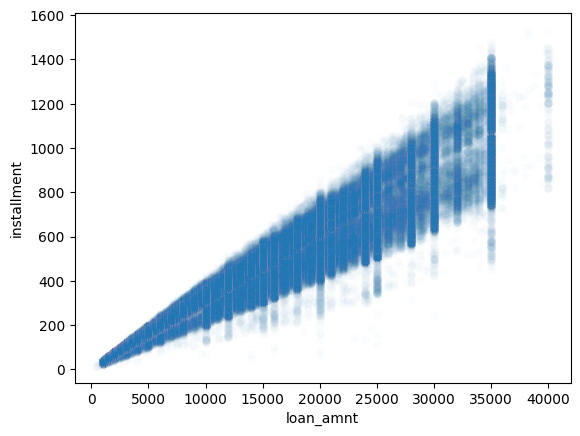

In [14]:
sns.scatterplot(x = 'loan_amnt', y = 'installment', data = df, alpha = 0.02)

- This correlation looks too good to be true, and in my opinion it is, given the fact that this is a historical database, and the installment is basically the monthly payment and the period of the loan is known, so it basically sais the same thing as loan_amnt

Another good route of analysis would be exploring the grades and sub_grades given by the company

In [15]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [16]:
df['sub_grade'].unique() #basicall it also contains the 'grade' class

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

- The next intuitive question would be if there is some relationship between loan_status and the grade given by the loan company?

<AxesSubplot: xlabel='grade', ylabel='count'>

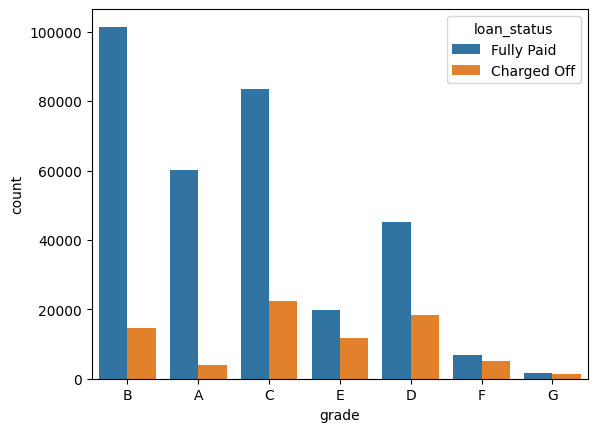

In [17]:
sns.countplot(x = 'grade', data = df, hue = 'loan_status')

- We can already see, that percentually speaking the ratio between Fully Paid debts and Charged Off debts quenches with the increase of the letter (A-->G), but let's display it better 

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

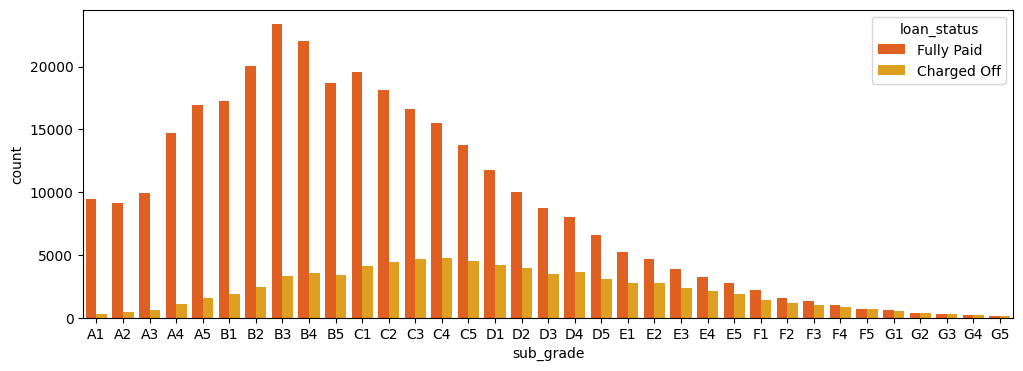

In [18]:
#First I also want to see the distribution of subgrades
plt.figure(figsize = (12,4))
#I also want them in order
order = sorted(df['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = df, order = order, palette = 'autumn', hue = 'loan_status')

- So it is now extremely clear that the loans after F are getting extremely risky for the bank, almost having a 1:1 ratio between paid off and not paid off

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

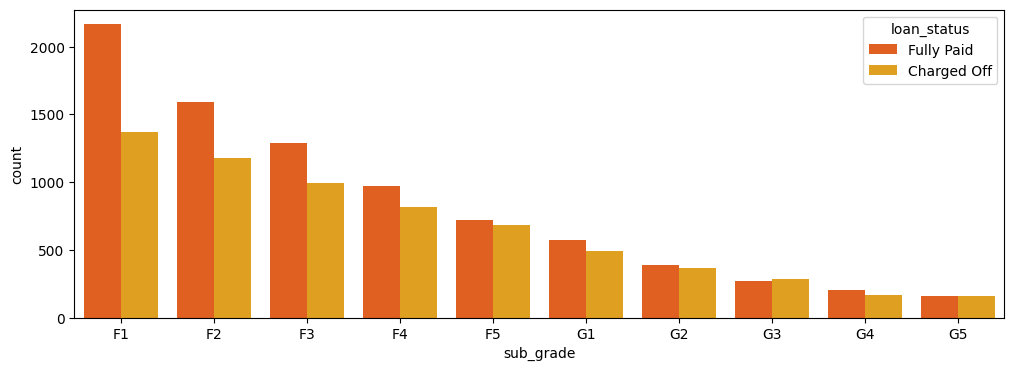

In [19]:
plt.figure(figsize = (12,4))
F_and_G = df[(df['grade'] == 'G') | (df['grade'] == 'F')]
order = sorted(F_and_G['sub_grade'].unique())
sns.countplot(x = 'sub_grade', data = F_and_G, order = order, palette = 'autumn', hue = 'loan_status')

Most part of the analysis of the data is done in my opinion, maybe there is more to it, but I will do this last few things and then carry on (basically transforming the prediction value to 1 for Fully Paid and 0 for Charged Off debt

In [20]:
#We create a new column which eventualy will be the prediction target
df['paid_off_loan'] = df['loan_status'].map({'Fully Paid' :1, 'Charged Off':0})

In [21]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,paid_off_loan
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


Since we have the target label as a numerical value, we can see the correlations between it and other numerical values in the dataset

In [22]:
df.corr()['paid_off_loan'].sort_values

C:\Users\Leon\AppData\Local\Temp\ipykernel_3520\2347867169.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['paid_off_loan'].sort_values


<bound method Series.sort_values of loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
paid_off_loan           1.000000
Name: paid_off_loan, dtype: float64>

C:\Users\Leon\AppData\Local\Temp\ipykernel_3520\100505102.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['paid_off_loan'].sort_values().drop('paid_off_loan').plot(kind = 'bar')


<AxesSubplot: >

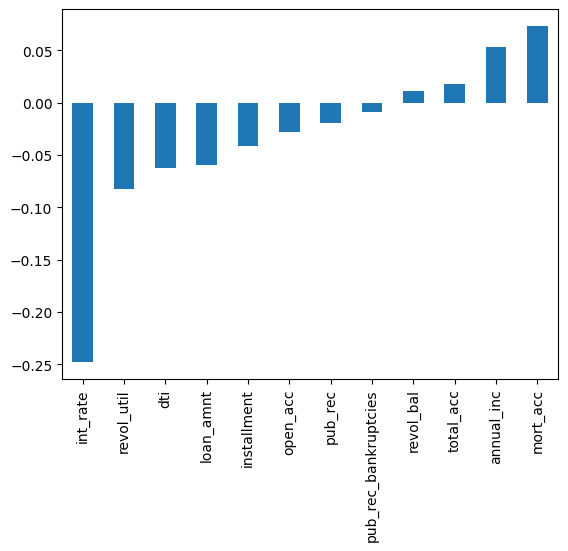

In [23]:
#and also visually:
df.corr()['paid_off_loan'].sort_values().drop('paid_off_loan').plot(kind = 'bar')

- As a quick conclusion for this, int_rate has the highest correlation, which makes sense beacuse maybe if the interest rate is high, the loan will not be paid

Let's get back to the missing data!

In [24]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
paid_off_loan               0
dtype: int64

In [25]:
#I would like to see what % of the total df length is represented by this missing values
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
paid_off_loan           0.000000
dtype: float64

In [26]:
#I will start from top of missing to bottom:
df['emp_title'].nunique()

173105

In [27]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

- Given the fact that there are 170k+ job titles, and getting dummy variables would be extremely time wasteful, and creating categories would take a lot of assumptions that are not relevant, the best is to drop this column entirely

In [28]:
df = df.drop('emp_title', axis = 1)

In [29]:
df['emp_length'].unique() 

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [30]:
sorted(df['emp_length'].dropna().unique()) 

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [31]:
emp_length_sorted = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot: xlabel='emp_length', ylabel='count'>

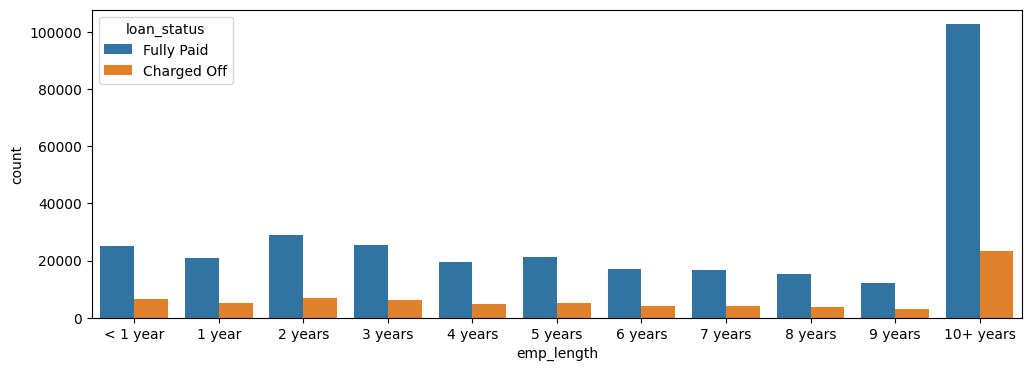

In [32]:
#Now I have a sorted list for this values and I can represent them visually
plt.figure(figsize=(12,4))
sns.countplot(x = 'emp_length', data = df, order = emp_length_sorted, hue = 'loan_status' )

- This plot somehow states the obvious, where peole that have stable long term jobs get loans

In the following I will try to get a percentage of charge offs per employement length, beacuse it could be interesting to see if people with temporary jobs just take the loan and run off

In [33]:
#Basically transform the previous plot to maths
emp_length_c = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [34]:
emp_length_f = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [35]:
percent_c_f = 100 * (emp_length_c/(emp_length_f+emp_length_c))

In [36]:
percent_c_f

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

- So as a note here: regardless of employement length, aprox 20% of people will not pay their loans

In [37]:
#We can drop this column without any doubt, because i hods no relevant information
df = df.drop('emp_length', axis = 1)

Next missing values are found in the 'title' column, which is almost the same, basically a subcategory of 'purpose', which has no missing value, so it makes sense only to keep one. Here's what I mean: 

In [38]:
df['title'].head(15)

0                    Vacation
1          Debt consolidation
2     Credit card refinancing
3     Credit card refinancing
4       Credit Card Refinance
5          Debt consolidation
6            Home improvement
7        No More Credit Cards
8          Debt consolidation
9          Debt Consolidation
10         Debt Consolidation
11    Credit card refinancing
12         Debt consolidation
13         Debt consolidation
14                   Business
Name: title, dtype: object

In [39]:
df['purpose'].head(15)

0               vacation
1     debt_consolidation
2            credit_card
3            credit_card
4            credit_card
5     debt_consolidation
6       home_improvement
7            credit_card
8     debt_consolidation
9     debt_consolidation
10    debt_consolidation
11           credit_card
12    debt_consolidation
13    debt_consolidation
14        small_business
Name: purpose, dtype: object

In [40]:
#We can easily drop title:
df = df.drop('title', axis = 1)

In [41]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
paid_off_loan               0
dtype: int64

Let's deal with mort_acc, which basically are the number of mortgage accounts

In [42]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [43]:
#I wouldn't like to drop entirely this column, because it holds meaningful information
#In this case I would like to see what correlates with it and fill the missing value based on that
df.corr()['mort_acc'].sort_values()

C:\Users\Leon\AppData\Local\Temp\ipykernel_3520\2325776017.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
paid_off_loan           0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [44]:
#We see a good correlation between total accounts and mortgage accounts

#My approach is to simply calculate the average mort_acc per total_acc and fill the missing values with this values

tot_acc_mean = df.groupby('total_acc')['mort_acc'].mean()

In [45]:
tot_acc_mean

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [46]:
def mort_acc_fill(total_acc,mort_acc):
    #we check if there are missing values and return the previously calc. mean
    if np.isnan(mort_acc):
        return tot_acc_mean[total_acc]
    else:
        return mort_acc
        

In [47]:
#Apply the funcion on the dataset
df['mort_acc'] = df.apply(lambda x: mort_acc_fill(x['total_acc'], x['mort_acc']), axis = 1 )

In [48]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,paid_off_loan
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [49]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
paid_off_loan             0
dtype: int64

The remaining two columns with missing values are extremely small so we may as well just drop the rows where they appear

In [50]:
df = df.dropna()

In [51]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
paid_off_loan           0
dtype: int64

**The dataset is now free of missing values, however, there are still some categorical values that the model couldn't train on, so we have to deal with those**

In [52]:
#Let's get the categorical columns:
df.select_dtypes(include=['object']).columns.tolist()

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

- In what follows, I will go through each of them and decide if I do one-hot encoding on them or drop them

In [53]:
# First value is: 'term', which stands for number of payments in order to pay back the loan
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [57]:
#We see a binary output, so either 36 months or 60 months

#A good decision for me would be to keep ony the numerical values of the columns, so to know if a client has more or less time to pay back the loan
df['term'] = df['term'].apply(lambda term: int(term[:3]))

C:\Users\Leon\AppData\Local\Temp\ipykernel_3520\1268194903.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].apply(lambda term: int(term[:3]))


In [58]:
df['term'] #I wanted o use mapping but for some reason it didn't work so I used this primal exprimation, but it does the job!

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [59]:
#Next on the list is 'grade'

#If we recall, we did some analysis on the grade column and reached the conclusion that all it's information is contained in the 'sub-grade' column, so:
df = df.drop('grade', axis = 1)

In [60]:
#Next step is to get dummy variables on the sub-grade entries

#Also I have to pay attention to not encode duplicate variables and use 'drop_first'
dummy_var = pd.get_dummies(df['sub_grade'], drop_first=True)

In [62]:
#Now it's time to concat it with the df and also drop the 'sub_grade' column
df = pd.concat([df.drop('sub_grade',axis = 1), dummy_var], axis = 1)

In [63]:
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#Next stop would be 'home_ownership'
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

- None and any categories represent a very small number and it would't really make sense to separately create dummies for them, so I just join them with the 'other' category

In [65]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [66]:
df['home_ownership'].value_counts() #to check if it worked

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [67]:
#get dummies for them
dummy_var = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership',axis = 1), dummy_var], axis = 1)

I found 4 columns for which I could easily get dummies for, because they don't have a lot of different values and they don't need any pre-engineering: 'verification_status','application_type', 'initial_list_status','purpose'

In [68]:
#This column indicates if the income was verified or not
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [69]:
#It shows if the application for the loan is individual or with a co-borrower
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [70]:
#It shows the initial listing status by two letter given by the loaning company
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [71]:
#Purpose as shown before is a category provided for the borrower
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [74]:
#Get dummies for all
dummy_var = pd.get_dummies(df[['verification_status','application_type', 'initial_list_status','purpose']], drop_first=True)
df = pd.concat([df.drop(['verification_status','application_type', 'initial_list_status','purpose'],axis = 1), dummy_var], axis = 1)

In [75]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'paid_off_loan', 'terms', 'A2', 'A3',
       'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2',
       'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose

In [76]:
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,0,0,0,0,0,0


- Next column is the 'adress column', which tends to have some specific street and in the end the zip-code. For generalization I think it's a good ideea to use only the zip-codes 

In [78]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [80]:
#Zip_code extraction
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [82]:
df['zip_code'].value_counts() #We can see there are not to many zip_codes and can be transformed into dummies

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [83]:
df.to_csv('BankLoan.csv') # I saved the csv file to be able to respresent it in Tableau

I wanted to quickly get a map of the location where the most money is borrowed, just to get an ideea if the locaton matters(this was a bit more a headache than I thought, because Tableau didn't recognise any Zip-code,so I had to manually check for each lat/long)

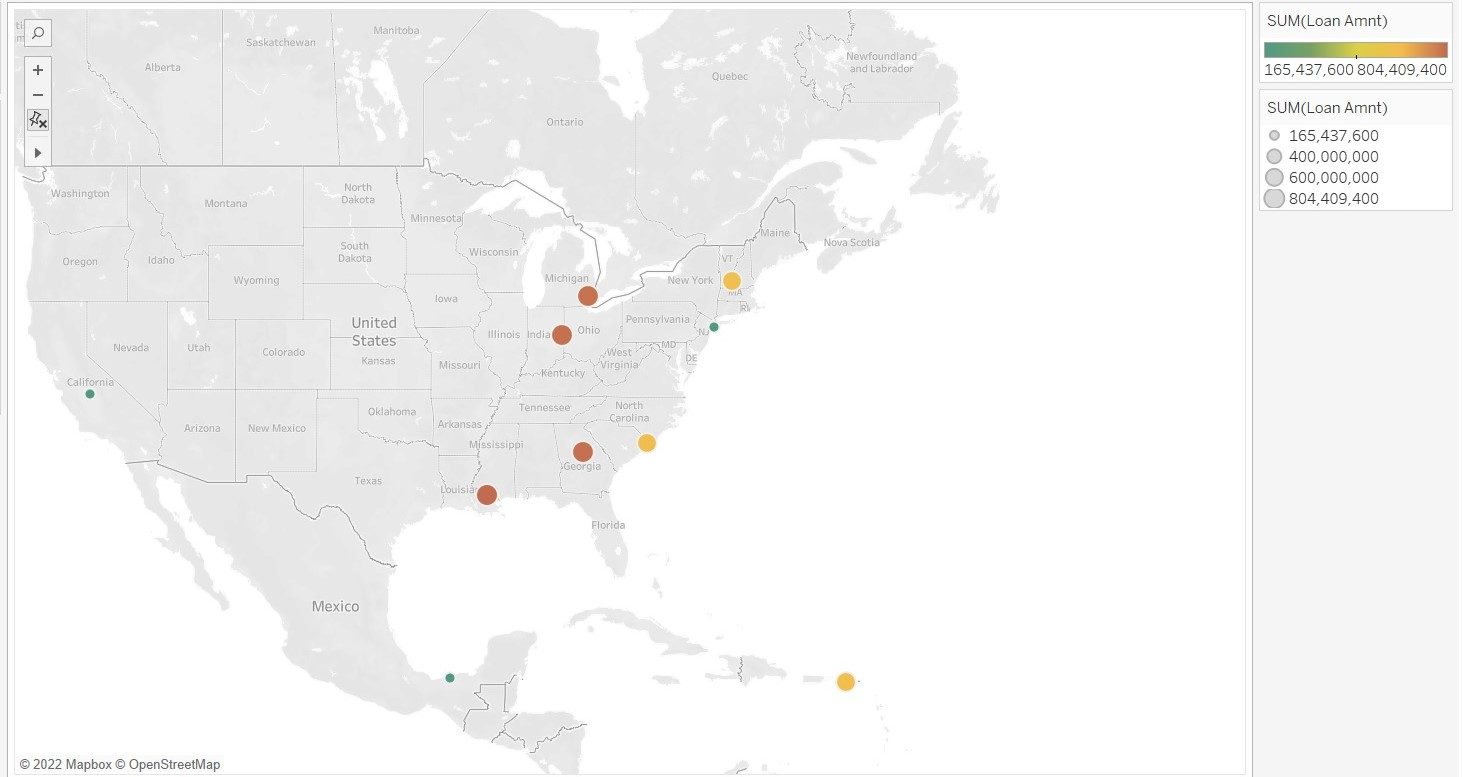

We can clearly see the most borrowers live either in Michigan, Georgia, India or Louisiana, so this zip_code feature is indeed an important one

In [85]:
#get dummies
dummy_var = pd.get_dummies(df['zip_code'], drop_first=True)
df = pd.concat([df.drop('zip_code',axis = 1), dummy_var], axis = 1)

In [86]:
df = df.drop('address', axis = 1)

Next feature would be the issue_d, which stands for the date that the loan was issued. However we try to predict wheter to give out a loan or not, so we don't really need this column, because it would honestly turn into data leakage

In [87]:
df = df.drop('issue_d', axis = 1)

In [88]:
#Next column is earliest_cr_line

#This stands for the month the borrower's earliest reported credit line was opened
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [89]:
#We are just interested in the year basically, because inflation and other financial characteristics can be determined exactly over a year, and plus, the month doesn't really have a day to it

#So my tendance is to extract th year
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda year: int(year[-4:]))

In [90]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

# In my opinion, this dataset has been analyzed and engineered enough in order to produce some good predictions, so let's start buiding the model

**This being a classification problem, my thoughts are going with an artificial neural network using the Rectified Linear Unit as the activation function for the neuronal depth in the hidden layers and the Sigmoid activation function for the single output layer. For the gradient descent, in order to update and create better weights and biases I will use the 'adam' optimizer and finally for the loss function I was thinking about 'cross entropy' loss function.**

- First I want to try and run the model for all the inputs, and than maybe do as promised, cut the df at an annual income greater than 250k or 500k, but it depends on the loss function and the onfusion matrix's outputs.

In [93]:
# First step is to split the data in training and testing parameters
from sklearn.model_selection import train_test_split

#I want the model to predict the 'paid_off_loan' value, so I can now drop the loan_status, which is only the categorical data of my prediction label
#df = df.drop('loan_status', axis = 1)

In [95]:
#Setting the variables for the model:
X = df.drop('paid_off_loan', axis = 1).values

y = df['paid_off_loan'].values

In [96]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [98]:
#Next step is to normlize the data, in order to get better outputs
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Fitting only the training features, to prevent data leakage
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [105]:
X_train.shape

(316175, 79)

In [124]:
#I usualy follow a rule that states that the first layer should be of a width of the nr of features(columns)
model = Sequential()

model.add(Dense(79, activation = 'relu'))
model.add(Dropout(0.2)) #20% of the neuron from this layer will be randoemly turned off in order not to overfit

#In each hidden layer I will reduce the number of neuron to about half
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(9, activation = 'relu'))
model.add(Dropout(0.2))

#output neuron:

model.add(Dense(units = 1, activation = 'sigmoid'))

#Time to compile the model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [125]:
#Running the model:

model.fit(x = X_train, y = y_train, epochs = 25, batch_size = 256,
         validation_data = (X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 8s 5ms/step - loss: 0.3259 - val_loss: 0.2662
Epoch 2/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2714 - val_loss: 0.2639
Epoch 3/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2661 - val_loss: 0.2644
Epoch 4/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2643 - val_loss: 0.2638
Epoch 5/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2639 - val_loss: 0.2641
Epoch 6/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2631 - val_loss: 0.2628
Epoch 7/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.2628 - val_loss: 0.2620
Epoch 8/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2622 - val_loss: 0.2627
Epoch 9/25
1236/1236 [==============================] - 7s 5ms/step - loss: 0.2620 - val_loss: 0.2631
Epoch 10/25
1236/1236 [==============================] - 6s 5ms/step - loss: 0.261

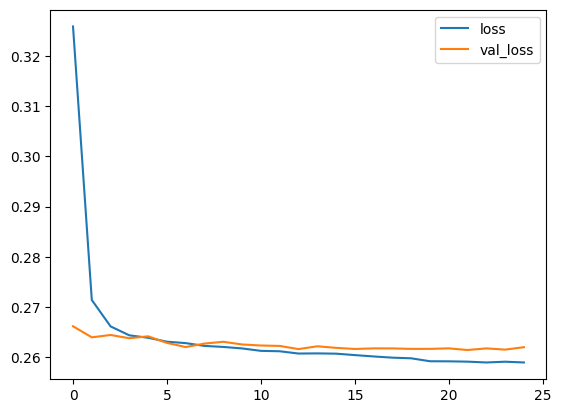

In [126]:
losses = pd.DataFrame(model.history.history).plot()

- So it looks like than on 30 epochs both the training_loss and validation_loss dicreased but we didn't really improve that much on validation. Maybe it would be worth following more epochs with an early stop to see the behaviour

In [127]:
#Let's evaluate this model first
from sklearn.metrics import classification_report, confusion_matrix

In [128]:
#get actual predictions
predictions = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 3s 1ms/step


In [129]:
#Let's print out  classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



Let's discuss this report for a moment:
- First of all the accuracy is 89%, but this value can be misleading, as I said in the beginning, because the two classes are so imbalanced, almost 80% being 'Paid Off' so 1 in our case, the accuracy doen't mean that much
- However, we can see through precision and recall we performed really well on the 'paid off' labels and not so good on the 'charged off'.
- This can be easily seen by the F1 score, which is the harmonic mean of recall and precision

**Overall we can say this model is learning from the dataset**

In [130]:
#Let me also print out the confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 6720,  8938],
       [    0, 63386]], dtype=int64)

- We can clearly see here that we suffer a little with False Negatives, so the 0 cases or 'Charged off'

**Let's see how the model perform for a random input**

In [131]:
#Randomly choose an index
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('paid_off_loan', axis = 1).iloc[random_ind]

In [132]:
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 79, dtype: float64

In [134]:
#Transform it to a np.array, rshape and scale it
new_customer = scaler.transform(new_customer.values.reshape(1,79))

In [136]:
(model.predict(new_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 23ms/step


array([[1]])

**The model predicted that the bank should give this person a loan**

In [138]:
#Let's check with the original df
df.iloc[random_ind]['paid_off_loan']

1.0

**Yes, the model predicted this specific output correctly**

In [139]:
#Let's save the model!
from tensorflow.keras.models import load_model
model.save('Bank Loan Prediction.h5')

In [140]:
#Let's see if we have a better output on the database with annual income <= 250k
df2 = df.loc[df["annual_inc"] <= 250000]

In [143]:
df2['paid_off_loan']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: paid_off_loan, Length: 391934, dtype: int64

In [160]:
X = df2.drop('paid_off_loan', axis = 1).values

y = df2['paid_off_loan'].values

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [162]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Fitting only the training features, to prevent data leakage
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
model = Sequential()

model.add(Dense(79, activation = 'relu'))
model.add(Dropout(0.2)) #20% of the neuron from this layer will be randoemly turned off in order not to overfit

#In each hidden layer I will reduce the number of neuron to about half
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(9, activation = 'relu'))
model.add(Dropout(0.2))

#output neuron:

model.add(Dense(units = 1, activation = 'sigmoid'))

#Time to compile the model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [165]:
model.fit(x = X_train, y = y_train, epochs = 25, batch_size = 256,
         validation_data = (X_test, y_test))

Epoch 1/25
1225/1225 [==============================] - 12s 7ms/step - loss: 0.3187 - val_loss: 0.2636
Epoch 2/25
1225/1225 [==============================] - 9s 7ms/step - loss: 0.2708 - val_loss: 0.2630
Epoch 3/25
1225/1225 [==============================] - 9s 7ms/step - loss: 0.2663 - val_loss: 0.2613
Epoch 4/25
1225/1225 [==============================] - 9s 7ms/step - loss: 0.2646 - val_loss: 0.2624
Epoch 5/25
1225/1225 [==============================] - 9s 7ms/step - loss: 0.2631 - val_loss: 0.2618
Epoch 6/25
1225/1225 [==============================] - 9s 7ms/step - loss: 0.2623 - val_loss: 0.2611
Epoch 7/25
1225/1225 [==============================] - 9s 7ms/step - loss: 0.2616 - val_loss: 0.2617
Epoch 8/25
1225/1225 [==============================] - 9s 7ms/step - loss: 0.2615 - val_loss: 0.2605
Epoch 9/25
1225/1225 [==============================] - 9s 7ms/step - loss: 0.2612 - val_loss: 0.2602
Epoch 10/25
1225/1225 [==============================] - 9s 7ms/step - loss: 0.26

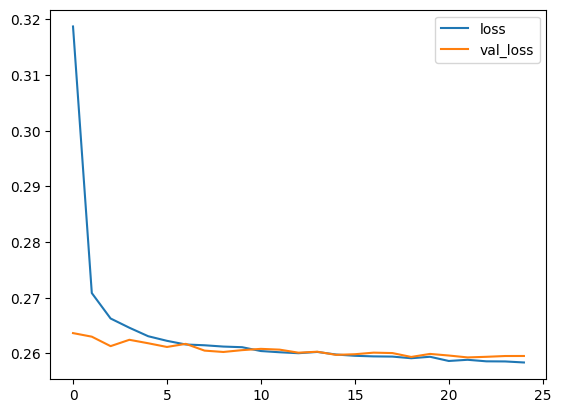

In [167]:
new_losses = pd.DataFrame(model.history.history).plot()

In [168]:
new_predictions = (model.predict(X_test) > 0.5).astype("int32")

2450/2450 [==============================] - 5s 2ms/step


In [169]:
print(classification_report(y_test, new_predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15394
           1       0.88      1.00      0.93     62993

    accuracy                           0.89     78387
   macro avg       0.94      0.71      0.77     78387
weighted avg       0.90      0.89      0.87     78387



We don't see any real improvement through this sectioning of the dataset, I will try to add more layers to the NN and run the model for more epochs

In [170]:
model = Sequential()

model.add(Dense(79, activation = 'relu'))
model.add(Dropout(0.2)) #20% of the neuron from this layer will be randoemly turned off in order not to overfit

#In each hidden layer I will reduce the number of neuron to about half
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(9, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.2))

#output neuron:

model.add(Dense(units = 1, activation = 'sigmoid'))

#Time to compile the model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [171]:
model.fit(x = X_train, y = y_train, epochs = 50, batch_size = 256,
         validation_data = (X_test, y_test))

Epoch 1/50
1225/1225 [==============================] - 14s 8ms/step - loss: 0.3857 - val_loss: 0.2663
Epoch 2/50
1225/1225 [==============================] - 10s 9ms/step - loss: 0.3156 - val_loss: 0.2687
Epoch 3/50
1225/1225 [==============================] - 10s 8ms/step - loss: 0.3115 - val_loss: 0.2646
Epoch 4/50
1225/1225 [==============================] - 10s 8ms/step - loss: 0.3105 - val_loss: 0.2631
Epoch 5/50
1225/1225 [==============================] - 12s 10ms/step - loss: 0.3098 - val_loss: 0.2634
Epoch 6/50
1225/1225 [==============================] - 11s 9ms/step - loss: 0.3095 - val_loss: 0.2644
Epoch 7/50
1225/1225 [==============================] - 9s 7ms/step - loss: 0.3090 - val_loss: 0.2617
Epoch 8/50
1225/1225 [==============================] - 10s 8ms/step - loss: 0.3088 - val_loss: 0.2646
Epoch 9/50
1225/1225 [==============================] - 11s 9ms/step - loss: 0.3075 - val_loss: 0.2639
Epoch 10/50
1225/1225 [==============================] - 10s 8ms/step - l

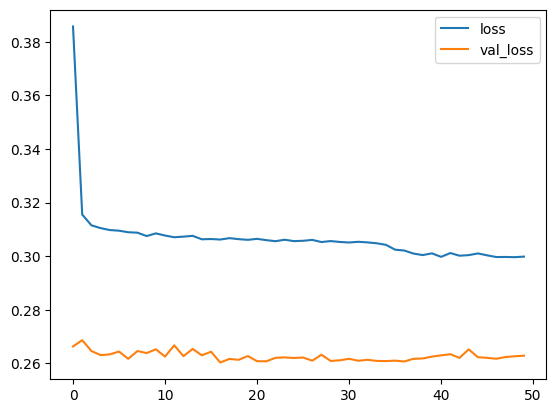

In [172]:
new_losses2 = pd.DataFrame(model.history.history).plot()

- From a first look, adding this many layers doesn't do so well on the training data, but does pretty well on validation

In [173]:
new_predictions2 = (model.predict(X_test) > 0.5).astype("int32")

2450/2450 [==============================] - 5s 2ms/step


In [174]:
print(classification_report(y_test, new_predictions2))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15394
           1       0.88      1.00      0.93     62993

    accuracy                           0.89     78387
   macro avg       0.92      0.72      0.77     78387
weighted avg       0.90      0.89      0.87     78387



In [175]:
confusion_matrix(y_test,new_predictions2)

array([[ 6878,  8516],
       [  261, 62732]], dtype=int64)

A conclusion for this take-on is that the val_loss becomes more noisy do to the big number of neuronal layers and the great interconnection between them. We are doing slightly better on 'charged off' loans but we lost in 'Paid off'. The F1-score is almost exactly the same, so we didn't do much.

One last try would be doing less layers with more epochs and add early stops. Let's hope we get a better F1 score out of this, if not, I demonstrated that the model still makes valid predictions, so it can be used and does pretty well.

In [177]:
model = Sequential()

model.add(Dense(79, activation = 'relu'))
model.add(Dropout(0.2)) #20% of the neuron from this layer will be randoemly turned off in order not to overfit

#In each hidden layer I will reduce the number of neuron to about half
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(9, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.1))

#output neuron:

model.add(Dense(units = 1, activation = 'sigmoid'))

#Time to compile the model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [178]:
from tensorflow.keras.callbacks import EarlyStopping

#Let's add an early stopping point, let's say after we don't see an improvement, wait 5 more epochs and then stop

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [179]:
model.fit(x = X_train, y = y_train, epochs = 100, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Epoch 1/100
9799/9799 [==============================] - 48s 5ms/step - loss: 0.2849 - val_loss: 0.2674
Epoch 2/100
9799/9799 [==============================] - 46s 5ms/step - loss: 0.2677 - val_loss: 0.2635
Epoch 3/100
9799/9799 [==============================] - 46s 5ms/step - loss: 0.2666 - val_loss: 0.2648
Epoch 4/100
9799/9799 [==============================] - 47s 5ms/step - loss: 0.2659 - val_loss: 0.2636
Epoch 5/100
9799/9799 [==============================] - 47s 5ms/step - loss: 0.2652 - val_loss: 0.2610
Epoch 6/100
9799/9799 [==============================] - 46s 5ms/step - loss: 0.2648 - val_loss: 0.2628
Epoch 7/100
9799/9799 [==============================] - 45s 5ms/step - loss: 0.2645 - val_loss: 0.2611
Epoch 8/100
9799/9799 [==============================] - 44s 4ms/step - loss: 0.2644 - val_loss: 0.2617
Epoch 9/100
9799/9799 [==============================] - 45s 5ms/step - loss: 0.2638 - val_loss: 0.2625
Epoch 10/100
9799/9799 [==============================] - 45s 5m

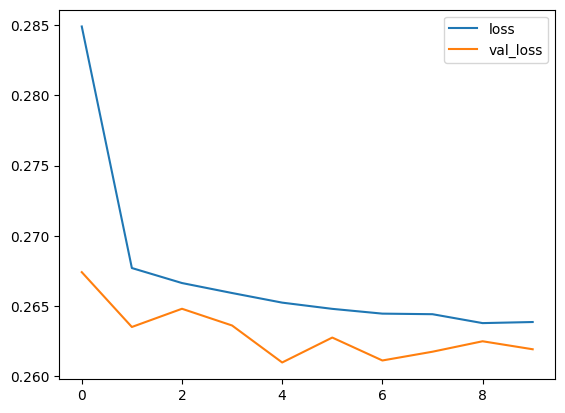

In [180]:
new_losses3 = pd.DataFrame(model.history.history).plot()

In [181]:
new_predictions3 = (model.predict(X_test) > 0.5).astype("int32")

2450/2450 [==============================] - 5s 2ms/step


In [182]:
print(classification_report(y_test, new_predictions3))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15394
           1       0.88      1.00      0.93     62993

    accuracy                           0.89     78387
   macro avg       0.94      0.71      0.77     78387
weighted avg       0.90      0.89      0.87     78387



- Again, the imporvement is not visible, we saw that after 10 epochs there is no real improvement, so momentarily this is the best F1-score achiavable by the model, to I'm gonna stick to saving only the first one, because that is the one applied to all the data in the dataset,and still works as good as the other

# As a conclusion: in this project I analyzed a large dataset using python, visualisation tools as PowerBI and Tableau and created a model that can validly predict if the bank should give a loan to a customer or not. Hope you enjoyed!